In [22]:
import numpy as np
import pandas as pd

data = pd.read_csv('drug_consumption.data', header=None, index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [24]:
#импортируем все библиотеки для последующего анализа
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5


pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-whitegrid')

In [25]:
#из описания по ссылке возьмем названия столбцов, чтобы назвать "по-человечески"
cols = ['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl',
        'Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
data.columns = cols
data.head(2)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


In [26]:
#проверяем наличие пропусков в данных
data.isna().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [27]:
#проверяем наличие null в данных
data.isnull().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [36]:
#создадим новый датафрэйм с данными старого
data2 = data.copy()
data.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caff       1885 non-null   object 
 17  Cannabis   1885 non-null   object 
 18  Choc       1885 non-null   object 
 19  Coke       1885 non-null   object 
 20  Crack   

In [61]:
# Преобразуем метки в классы:
cat_cols = data2.select_dtypes('object').columns
for col in cat_cols:
    le = LabelEncoder()
    data2[col] = le.fit_transform(data2[col])

In [29]:
data2.head(2)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


In [ ]:
#type 'object' стал теперь 'int64'
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   int64  
 13  Amphet     1885 non-null   int64  
 14  Amyl       1885 non-null   int64  
 15  Benzos     1885 non-null   int64  
 16  Caff       1885 non-null   int64  
 17  Cannabis   1885 non-null   int64  
 18  Choc       1885 non-null   int64  
 19  Coke       1885 non-null   int64  
 20  Crack   

In [60]:
#посмотрим на датафрэйм с помощью доп метрик
data2.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


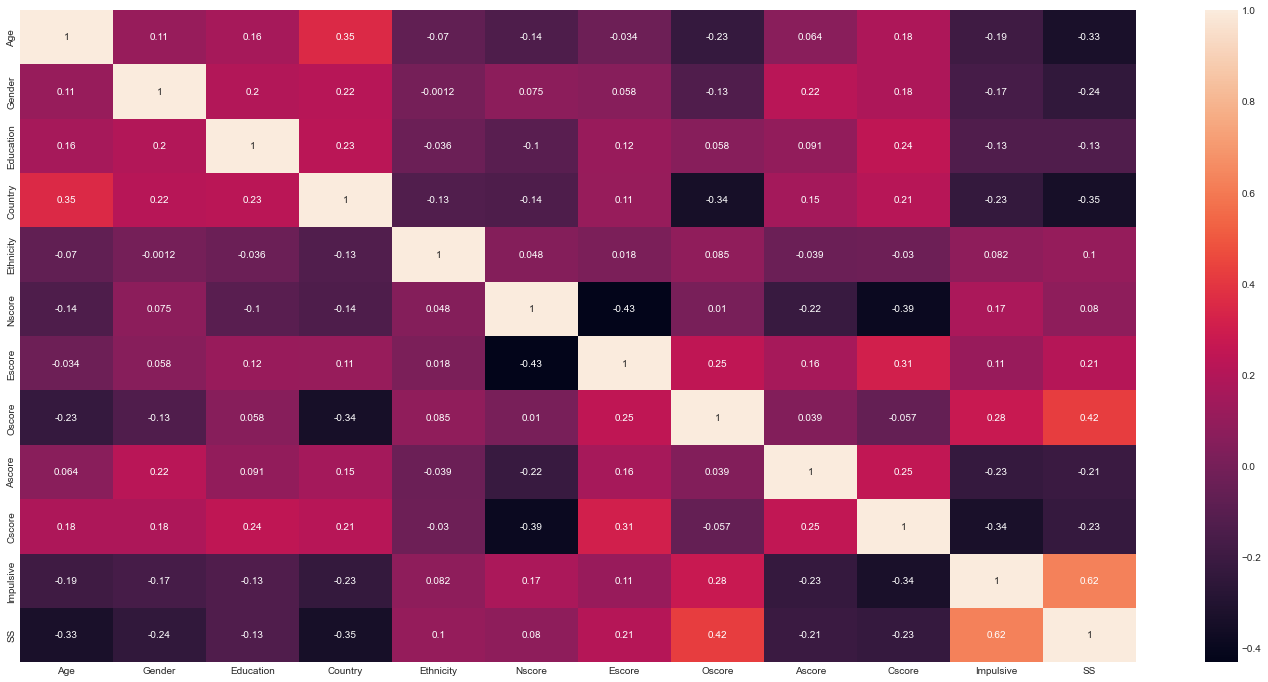

In [38]:
#посмотрим на корреляцию признаков:
rcParams['figure.figsize'] = 25, 12
ax = sns.heatmap(data2.corr(), annot=True)
#между некоторыми показателями есть достаточно серьзная корреляция (выделены черным)

In [40]:
#возьмем за целевую переменную этот признак
target_feat = 'LSD'

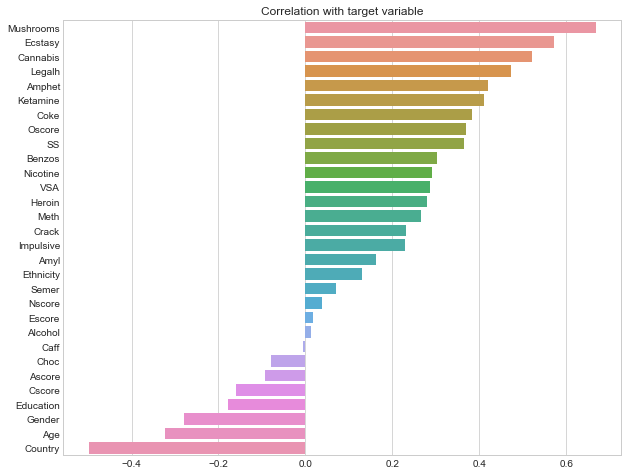

In [64]:
#проверим корреляцию целевой с другими признаками
corr_with_target = data2.corr().iloc[:, 25].sort_values(ascending=False)
xs = corr_with_target.iloc[1:].values
ys = corr_with_target.iloc[1:].index

plt.figure(figsize=(10, 8))

sns.barplot(x=xs, y=ys)

plt.title('Correlation with target variable')
plt.show()

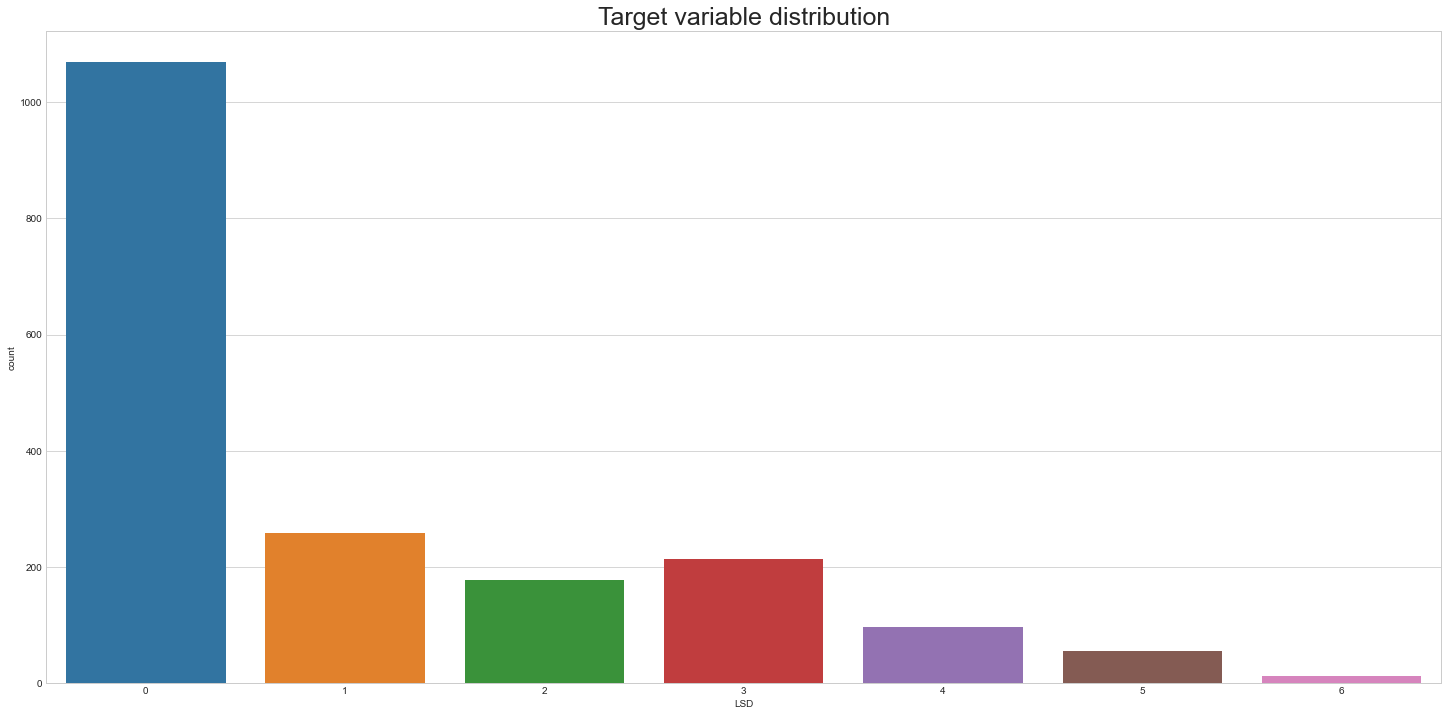

In [70]:
#посмотрим на распределение по классам
#на графике ниже виден сильный дисбаланс классов в сторону нулевого
sns.countplot(x=target_feat, data=data2)

plt.title('Target variable distribution', fontsize=25)
plt.show()

In [75]:
#на графике выше смотрели на уникальные значения в столбце LSD
data2.LSD.unique ()

array([0, 2, 1, 3, 4, 5, 6])

In [77]:
#объединим все классы выше 0-го в один класс, чтобы привести задачу к бинарной классификации
data3 = data2.copy()
data3.loc[data3[target_feat]>0, target_feat] = 1

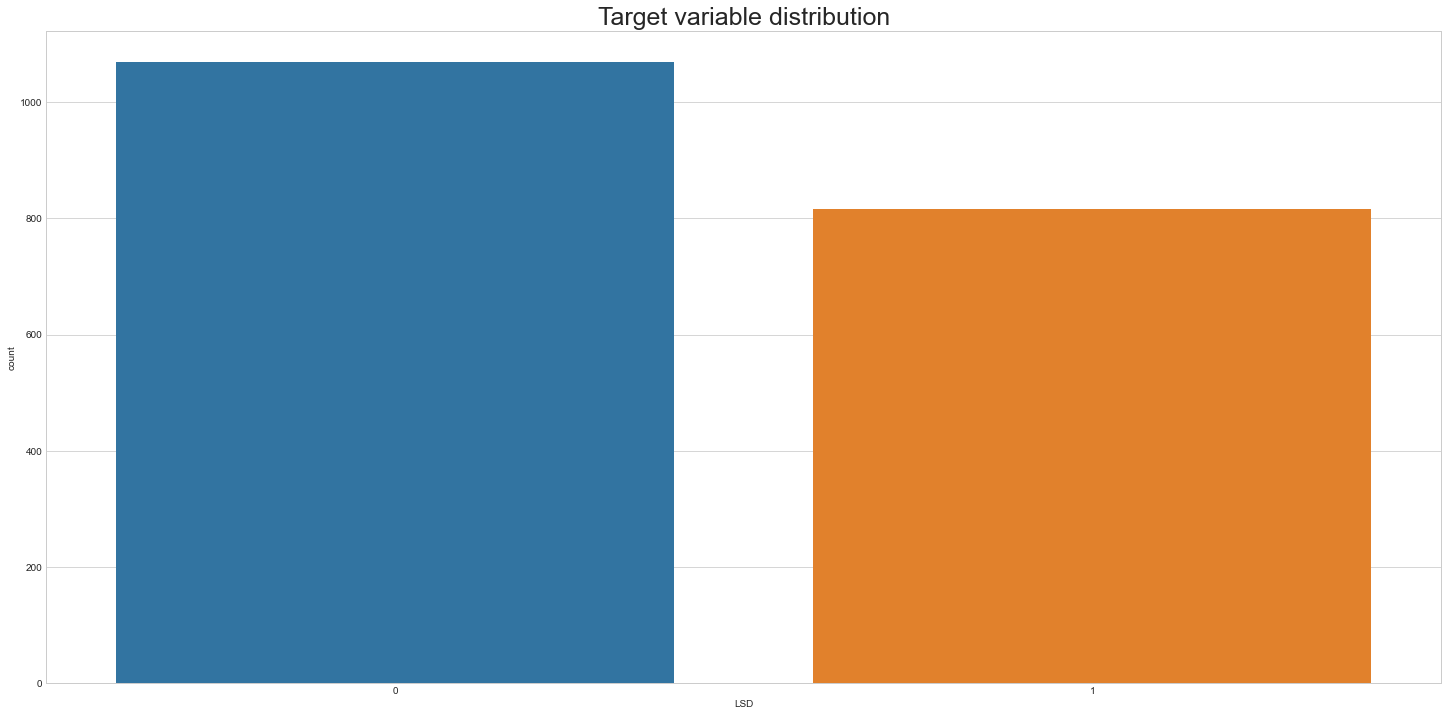

In [81]:
#и посмотрим снова на распределение, ожидая, что распределение +- 50%/50%
sns.countplot(x=target_feat, data=data3)

plt.title('Target variable distribution', fontsize = 25)
plt.show()

In [90]:
#напишем функции для последующей проверки результатов с помощью стандартных метрик как
#precision, recall, F-1 и визуализации
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))
    
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 33):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, 1.3, 1, 2])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [83]:
#разделим выборку на тренировочную и тестовую:
X = data3.drop(target_feat, axis=1) #выборка с  независимыми переменными
y = data3[target_feat] #наша зависимая переменная
feature_names = X.columns.to_list()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
#проведем процедуру стандартизации (приведение к нормальному) значений признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_names)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=feature_names)
X_train.shape, X_test.shape

((1413, 30), (472, 30))

In [91]:
#построим простую логистическую регрессию и посмотрим на результаты по метрикам
#ниже видно, что получили весьма высокие результаты, как на тренировочном датасете, 
#так и на тестовом с небольшой потерей качества

lr = LogisticRegression(solver="liblinear")

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       799
           1       0.83      0.81      0.82       614

    accuracy                           0.85      1413
   macro avg       0.84      0.84      0.84      1413
weighted avg       0.85      0.85      0.85      1413

TEST

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       270
           1       0.79      0.79      0.79       202

    accuracy                           0.82       472
   macro avg       0.81      0.81      0.81       472
weighted avg       0.82      0.82      0.82       472

CONFUSION MATRIX

col_0    0    1
LSD            
0      227   43
1       43  159


In [92]:
#протестируем KNN с разным кол-вом соседей (пляшем от пяти):
#все варианты показали примерно одинаковый результат ниже, чем у логистической регрессии

for n in range(5, 10):
    print('\nNeighbors =', n)
    model_knn = KNeighborsClassifier(n_neighbors=n)
    model_knn.fit(X_train, y_train)

    y_train_pred = model_knn.predict(X_train)
    y_test_pred = model_knn.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)


Neighbors = 5
TRAIN

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       799
           1       0.83      0.83      0.83       614

    accuracy                           0.86      1413
   macro avg       0.85      0.85      0.85      1413
weighted avg       0.86      0.86      0.86      1413

TEST

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       270
           1       0.73      0.70      0.71       202

    accuracy                           0.76       472
   macro avg       0.75      0.75      0.75       472
weighted avg       0.76      0.76      0.76       472

CONFUSION MATRIX

col_0    0    1
LSD            
0      217   53
1       61  141

Neighbors = 6
TRAIN

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       799
           1       0.87      0.78      0.82       614

    accuracy                           0.85      1

In [93]:
#протестируем random forest с разными параметрами:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

parameters = {
    'n_estimators': [200, 300],
    'max_features': np.arange(14, 18),
    'max_depth': np.arange(14, 18),
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(criterion='entropy'),
    param_grid=parameters,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

In [95]:
%%time
clf.fit(X_train, y_train)

CPU times: user 1.09 s, sys: 144 ms, total: 1.23 s
Wall time: 31.5 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': array([14, 15, 16, 17]),
                         'max_features': array([14, 15, 16, 17]),
                         'n_estimators': [200, 300]},
             scoring='f1_macro')

In [96]:
#посмотрим на гиперпараметры лучшей модели
clf.best_params_

{'max_depth': 17, 'max_features': 14, 'n_estimators': 200}

In [97]:
rfc = RandomForestClassifier(max_depth=17, 
                            max_features=15,
                            n_estimators=200, 
                            criterion='entropy'
                        )
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, max_features=15,
                       n_estimators=200)

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       1.00      1.00      1.00       614

    accuracy                           1.00      1413
   macro avg       1.00      1.00      1.00      1413
weighted avg       1.00      1.00      1.00      1413

TEST

              precision    recall  f1-score   support

           0       0.91      0.83      0.86       270
           1       0.79      0.89      0.84       202

    accuracy                           0.85       472
   macro avg       0.85      0.86      0.85       472
weighted avg       0.86      0.85      0.85       472

CONFUSION MATRIX

col_0    0    1
LSD            
0      223   47
1       23  179


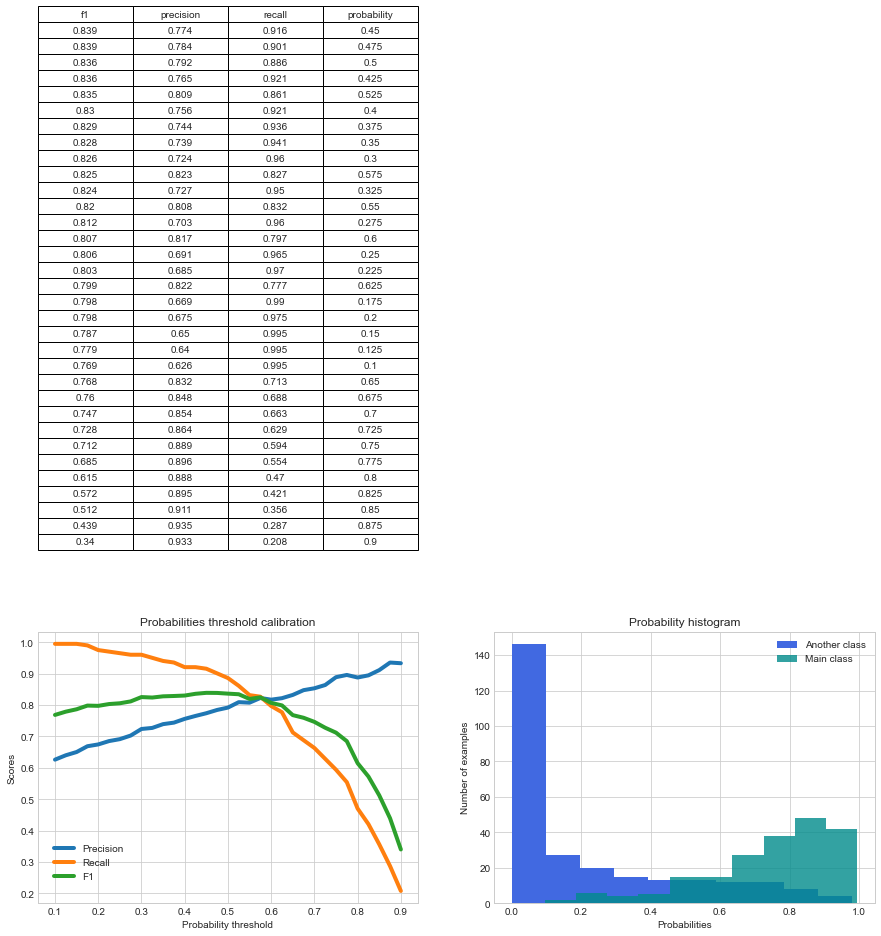

In [98]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
y_test_pred_probs = rfc.predict_proba(X_test)


get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

### Вывод:
Случайный лес показал на тестовой выборке результат немного выше, чем другие модели.